In [9]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras.optimizers import Adam
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter


In [10]:
train_path = '/home/kalyan/DataSets/DogsandCats/training_set/training_set/'
test_path = '/home/kalyan/DataSets/DogsandCats/test_set/test_set/'

In [11]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomBrightness(0.1),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(180, 180, 3),kernel_regularizer='l1'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(150, activation='relu' ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_contrast_1 (RandomCo  (None, 180, 180, 3)      0         
 ntrast)                                                         
                                                                 
 random_brightness_1 (Random  (None, 180, 180, 3)      0         
 Brightness)                                                     
                                                      

In [14]:

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
200/200 [==============================] - 45s 205ms/step - loss: 0.9597 - accuracy: 0.5355 - val_loss: 0.7903 - val_accuracy: 0.5800
Epoch 2/10
200/200 [==============================] - 40s 199ms/step - loss: 0.7706 - accuracy: 0.5828 - val_loss: 0.7429 - val_accuracy: 0.5825
Epoch 3/10
200/200 [==============================] - 40s 200ms/step - loss: 0.7237 - accuracy: 0.6045 - val_loss: 0.7912 - val_accuracy: 0.5300
Epoch 4/10
200/200 [==============================] - 40s 199ms/step - loss: 0.6954 - accuracy: 0.6269 - val_loss: 0.6902 - val_accuracy: 0.6275
Epoch 5/10
200/200 [==============================] - 41s 202ms/step - loss: 0.6910 - accuracy: 0.6289 - val_loss: 0.6946 - val_accuracy: 0.6125
Epoch 6/10
200/200 [==============================] - 41s 203ms/step - loss: 0.6680 - accuracy: 0.6514 - val_loss: 0.7138 - val_accuracy: 0.5750
Epoch 7/10
200/200 [==============================] - 40s 201ms/step - loss: 0.6630 - accuracy: 0.6403 - val_loss: 0.7075 - val_ac

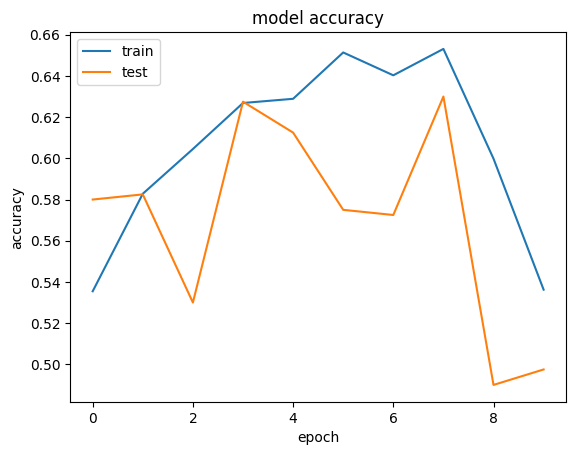

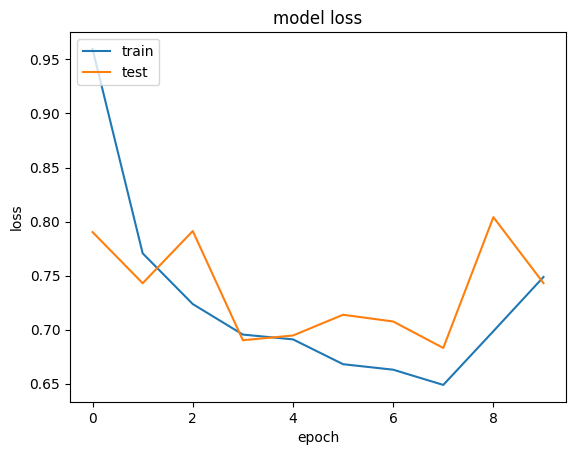

In [16]:
#plot accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.figure(1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
